## **TER**

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys
import re
from IPython.display import display, HTML

# chemin en modifer
chemin = "dataprojectstage_masterUPS.xlsx"

df = pd.read_excel(chemin)

In [2]:
!pip install PiML

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.2/12.2 MB 44.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 42.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.4/34.4 MB 16.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 23.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 535.7/535.7 kB 48.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 74.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 17.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.5/3.5 MB 50.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 213.5/213.5 kB 20.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 24.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.6/34.6 MB 12.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.9/22.9 MB 26.3 MB

In [1]:
from piml import Experiment
exp = Experiment(highcode_only=True)

(CVXPY) Feb 25 06:37:56 PM: Encountered unexpected exception importing solver GLOP:
RuntimeError('Unrecognized new version of ortools (9.7.2996). Expected < 9.5.0.Please open a feature request on cvxpy to enable support for this version.')
(CVXPY) Feb 25 06:37:56 PM: Encountered unexpected exception importing solver PDLP:
RuntimeError('Unrecognized new version of ortools (9.7.2996). Expected < 9.5.0.Please open a feature request on cvxpy to enable support for this version.')


---
## ***Visualisation des données***
---

In [ ]:
# transforme les variables ages en catégories (18-23, 24-30, 31-40, 41-50, 51-60, 61-70, 71-90)
df['Age'] = pd.cut(df['Age'], bins=[0, 23, 30, 40, 50, 60, 70, 100], labels=['0-23', '24-30', '31-40', '41-50', '51-60', '61-70', '71-100'])
df['Age'].value_counts()

51-60     1760
41-50     1711
31-40     1332
24-30      967
61-70      738
0-23       570
71-100     362
Name: Age, dtype: int64

In [ ]:
# transforme les variables job tenure en catégories (0-2, 3-5, 6-10, 11-20, 21-30, 31-40, 41-50, 51-80)
df['Job tenure'] = pd.cut(df['Job tenure'], bins=[-1, 1, 2, 5, 10, 20, 30, 40, 50, 82], labels=['0-1', '1-2', '3-5', '6-10', '11-20', '21-30', '31-40', '41-50', '51-82'])
df['Job tenure'].value_counts()

0-1      1786
11-20    1350
3-5      1313
6-10     1224
21-30     771
1-2       646
31-40     291
41-50      55
51-82       4
Name: Job tenure, dtype: int64

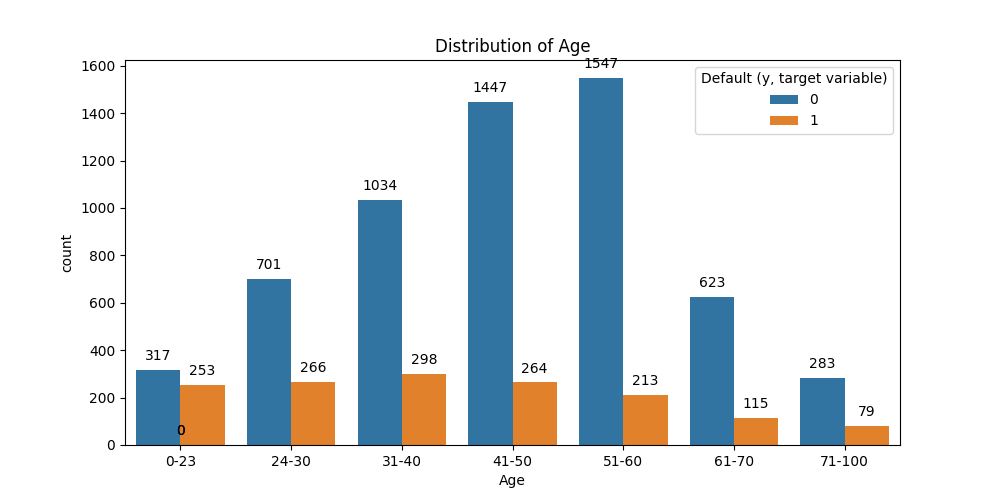

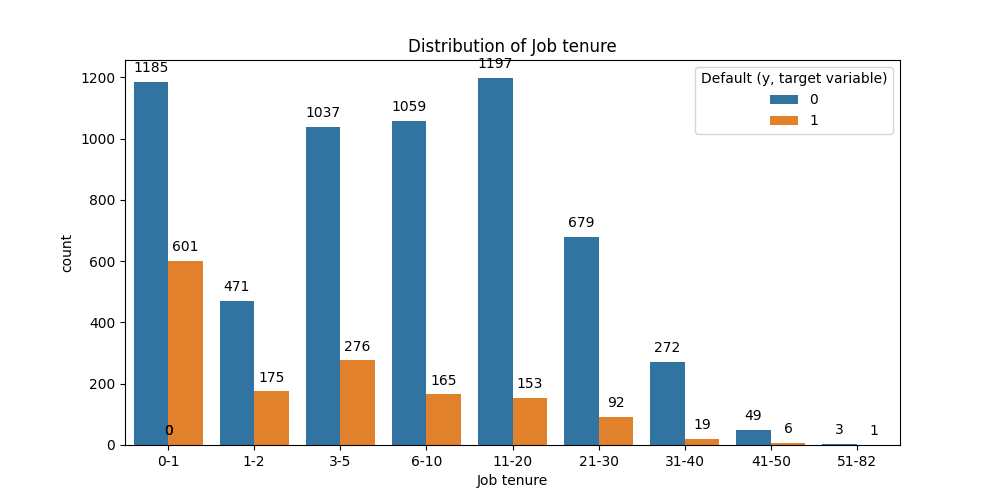

In [ ]:
from matplotlib.pyplot import scatter


# distribution de la variable cible en fonction de l'age
plt.figure(figsize=(10,5))
plot = sns.countplot(x='Age', hue='Default (y, target variable)', data=df)
plt.title('Distribution of Age')

# Ajouter le nombre de comptes à chaque barre
for p in plot.patches:
    plot.annotate(format(p.get_height(), '.0f'),
                  (p.get_x() + p.get_width() / 2., p.get_height()),
                  ha = 'center',
                  va = 'center',
                  xytext = (0, 10),
                  textcoords = 'offset points')

plt.show()

# distribution de la variable cible en fonction de l'ancienneté
plt.figure(figsize=(10,5))
plot = sns.countplot(x='Job tenure', hue='Default (y, target variable)', data=df)
plt.title('Distribution of Job tenure')

# Ajouter le nombre de comptes à chaque barre
for p in plot.patches:
    plot.annotate(format(p.get_height(), '.0f'),
                  (p.get_x() + p.get_width() / 2., p.get_height()),
                  ha = 'center',
                  va = 'center',
                  xytext = (0, 10),
                  textcoords = 'offset points')

plt.show()



In [ ]:
# plot de la variable cible en fonction de credit event
plt.figure(figsize=(10,5))
plot = sns.countplot(x='Credit event', hue='Default (y, target variable)', data=df)
plt.title('Distribution of Credit event')

# Ajouter le nombre de comptes à chaque barre
for p in plot.patches:
    plot.annotate(format(p.get_height(), '.0f'),
                  (p.get_x() + p.get_width() / 2., p.get_height()),
                  ha = 'center',
                  va = 'center',
                  xytext = (0, 10),
                  textcoords = 'offset points')




In [ ]:
plt.figure(figsize=(8, 6))
scatter = plt.scatter(df["Car price"], df["Funding amount"], c=df["Default (y, target variable)"], cmap='coolwarm')
plt.xlabel('Fund amount')
plt.ylabel('Age')
# legend for y_train
plt.legend(*scatter.legend_elements(), title="Default")
plt.show()

---
#### ***Standardisation des données numériques***
---

In [4]:
from sklearn.preprocessing import StandardScaler

# standard scaler pour numeric variables uniquement sans la variable cible
scaler = StandardScaler()
df_numeric = df.select_dtypes(include=['int64', 'float64'])
df_numeric = df_numeric.drop(columns=['Default (y, target variable)'])
df_scaled = scaler.fit_transform(df_numeric)
df_scaled = pd.DataFrame(df_scaled, columns=df_numeric.columns)




---
#### ***Encodage variables catégorielles***
---

In [5]:
# One hot encoding pour les variables catégorielles
from sklearn.preprocessing import OneHotEncoder
#encoder = OneHotEncoder(handle_unknown="error")
#age_encod = encoder.fit_transform(df[["Age"]]).toarray()
#df_age_encoded = pd.DataFrame(age_encod, columns=encoder.get_feature_names_out())
#jobtenure_encod = encoder.fit_transform(df[["Job tenure"]]).toarray()
#df_jobtenure_encoded = pd.DataFrame(jobtenure_encod, columns=encoder.get_feature_names_out())

#df1 = pd.concat([df_scaled, df_age_encoded], axis=1)
#df1 = pd.concat([df1, df_jobtenure_encoded], axis=1)
#df1 = pd.concat([df1, df["Default (y, target variable)"]], axis=1)
df1 = pd.concat([df_scaled, df["Default (y, target variable)"]], axis=1)

---
## ***Train Test Split***
---

In [6]:
from sklearn.model_selection import train_test_split
X = df1.drop("Default (y, target variable)", axis=1)
X = X.drop("ID", axis=1) # colonne inutile
y = df1["Default (y, target variable)"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=1/3, random_state=42)

print(f"TRAIN SIZE: {X_train.shape[0], y_train.shape[0]} -> {X_train.shape[0] / X.shape[0] * 100:.2f}%")
print(f"VAL   SIZE: {X_val.shape[0], y_val.shape[0]} -> {X_val.shape[0] / X.shape[0] * 100:.2f}%")
print(f"TEST  SIZE: {X_test.shape[0], y_test.shape[0]} -> {X_test.shape[0] / X.shape[0] * 100:.2f}%")

TRAIN SIZE: (5208, 5208) -> 70.00%
VAL   SIZE: (1488, 1488) -> 20.00%
TEST  SIZE: (744, 744) -> 10.00%


---
## ***PCA***
---

In [ ]:
# proportion of variance explained en fonction du nombre de composantes
from sklearn.decomposition import PCA
pca = PCA().fit(X_train)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.show()


In [ ]:
# pca
from sklearn.decomposition import PCA
pca = PCA(n_components=20)
pca.fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

# plot pca
plt.figure(figsize=(6, 4))
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap='coolwarm')
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')
plt.show()

plt.figure(figsize=(6, 4))
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 2], c=y_train, cmap='coolwarm')
plt.xlabel('First principal component')
plt.ylabel('Third Principal Component')
plt.show()

plt.figure(figsize=(6, 4))
plt.scatter(X_train_pca[:, 1], X_train_pca[:, 2], c=y_train, cmap='coolwarm')
plt.xlabel('Second principal component')
plt.ylabel('Third Principal Component')
plt.show()



In [ ]:
# slider dans tous les axes pour voir les composantes
from ipywidgets import interact, fixed
import ipywidgets as widgets
from mpl_toolkits.mplot3d import Axes3D


def plot_3d_pca(i, j, k):
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')
    scatter = ax.scatter(X_train_pca[:, i-1], X_train_pca[:, j-1], X_train_pca[:, k-1], c=y_train, label="Default", cmap='coolwarm')
    ax.set_xlabel(f"PCA {i}")
    ax.set_ylabel(f"PCA {j}")
    ax.set_zlabel(f"PCA {k}")
    cbar = plt.colorbar(scatter)
    cbar.set_label("Target")
    plt.title("PCA 3D Components Visualization")
    plt.show()

interact(plot_3d_pca, i=(1,3), j=(1, 3), k=(1, 3))


# fig = plt.figure(figsize=(10, 5))
# ax = fig.add_subplot(111, projection='3d')
# scatter = ax.scatter(X_train_pca[:, 2], X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, label="Default", cmap='coolwarm')
# ax.set_xlabel("PCA 1")
# ax.set_ylabel("PCA 2")
# ax.set_zlabel("PCA 3")
# cbar = plt.colorbar(scatter)
# cbar.set_label("Target")
# plt.title("PCA 3D Components Visualization")
# plt.show()

---
## ***Modèles***
---

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
# Naive Bayes
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.linear_model import Perceptron
# dummy classifier
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import balanced_accuracy_score, precision_score, recall_score, f1_score
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline


models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(),
    "SVC": SVC(probability=True),
    "KNN": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "XGBoost": XGBClassifier(),
    "KNN": KNeighborsClassifier(),

    "Naive Bayes": GaussianNB(),
    "Dummy": DummyClassifier( strategy='most_frequent', random_state=42)   # COMPARAISON IMPORTANTE
}

def fit_and_score(models, X_train, X_test, y_train, y_test):
    np.random.seed(42)
    model_scores = {}
    for name, model in models.items():
        model.fit(X_train, y_train)
        model_scores[name] = model.score(X_test, y_test)
    return model_scores

model_scores = fit_and_score(models, X_train, X_test, y_train, y_test)

# plot un tableau avec les scores
model_compare = pd.DataFrame(model_scores, index=["accuracy"])
print(model_compare.T)



# confusion matrix
y_preds = models['XGBoost'].predict(X_test)
confusion_matrix(y_test, y_preds)
# plot confusion matrix
sns.set(font_scale=1.5)
def plot_conf_mat(y_test, y_preds):
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                     annot=True,
                     cbar=False)
    plt.ylabel("true label")
    plt.xlabel("predicted label")

plot_conf_mat(y_test, y_preds)

# roc
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc



# plot roc curve

def plot_roc_curve(models, X_test, y_test):
    plt.figure(figsize=(10, 8))
    for name, model in models.items():
        y_proba = model.predict_proba(X_test)[:, 1]
        fpr, tpr, thresholds = roc_curve(y_test, y_proba)
        auc_score = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f"{name} AUC: {auc_score:.2f}")
    plt.plot([0, 1], [0, 1], "--", label="Guessing")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve")
    plt.legend()
    plt.show()

plot_roc_curve(models, X_test, y_test)






In [ ]:
# afficher les predictions et la vraie valeur par age
X_test2 = X_test.copy()
X_test2["y_preds"] = y_preds
X_test2["y_test"] = y_test


X_test2["Age"] = df["Age"]
X_test2["Job tenure"] = df["Job tenure"]



# plot de la prediction et true label en fonction de l'age
plt.figure(figsize=(6,3))
plot = sns.countplot(x='Age', hue='y_preds', data=X_test2)
plt.title('Predictions en fct de Age')

# Ajouter le nombre de comptes à chaque barre
for p in plot.patches:
    plot.annotate(format(p.get_height(), '.0f'),
                  (p.get_x() + p.get_width() / 2., p.get_height()),
                  ha = 'center',
                  va = 'center',
                  xytext = (0, 10),
                  textcoords = 'offset points')


# plot de la prediction et true label en fonction de l'age
plt.figure(figsize=(6,3))
plot = sns.countplot(x='Age', hue='y_test', data=X_test2)
plt.title('True label en fct de Age')

# Ajouter le nombre de comptes à chaque barre
for p in plot.patches:
    plot.annotate(format(p.get_height(), '.0f'),
                  (p.get_x() + p.get_width() / 2., p.get_height()),
                  ha = 'center',
                  va = 'center',
                  xytext = (0, 10),
                  textcoords = 'offset points')

In [ ]:
plt.figure(figsize=(8,4))
plot = sns.countplot(x='Job tenure', hue='y_preds', data=X_test2)
plt.title('Predictions en fct de Job tenure')

# Ajouter le nombre de comptes à chaque barre
for p in plot.patches:
    plot.annotate(format(p.get_height(), '.0f'),
                  (p.get_x() + p.get_width() / 2., p.get_height()),
                  ha = 'center',
                  va = 'center',
                  xytext = (0, 10),
                  textcoords = 'offset points')


# plot de la prediction et true label en fonction de l'age
plt.figure(figsize=(8,4))
plot = sns.countplot(x='Job tenure', hue='y_test', data=X_test2)
plt.title('True label en fct de Job tenure')

# Ajouter le nombre de comptes à chaque barre
for p in plot.patches:
    plot.annotate(format(p.get_height(), '.0f'),
                  (p.get_x() + p.get_width() / 2., p.get_height()),
                  ha = 'center',
                  va = 'center',
                  xytext = (0, 10),
                  textcoords = 'offset points')

In [ ]:
# balanced accuracy score
print(f"Balanced accuracy score: {balanced_accuracy_score(y_test, y_preds):.2f}%")


# on choisit la balanced accuracy score car les classes sont desequilibrées

Balanced accuracy score: 0.61%


### ***Evaluate Classifier***

In [32]:
from sklearn.metrics import roc_auc_score, balanced_accuracy_score
from sklearn.model_selection import cross_val_score
from IPython.display import display, HTML
from sklearn.metrics import r2_score

def evaluate_classifier(clf):
    name = getattr(clf, 'name', clf.__class__.__name__)
    clf.fit(X_train, y_train)
    score = clf.score(X_test, y_test)


    # Vérifie si le classificateur a une méthode `predict_proba`
    if hasattr(clf, "predict_proba"):
        y_proba = clf.predict_proba(X_test)[:, 1]  # scores de la classe positive
        auc_score = roc_auc_score(y_test, y_proba)
    elif hasattr(clf, "decision_function"):  # Utiliser `decision_function` si disponible
        y_scores = clf.decision_function(X_test)
        auc_score = roc_auc_score(y_test, y_scores)
    else:
        auc_score = None

    y_pred = clf.predict(X_test)
    balanced_score = balanced_accuracy_score(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    cv_scores_balanced_accuracy = cross_val_score(clf, X_train, y_train, cv=5, scoring='balanced_accuracy')
    mean_cv_score_balanced_accuracy = np.mean(cv_scores_balanced_accuracy)

    display(HTML(
        f"<h2>{name}</h2>"
        f"Test Accuracy: <b>{score:7.2%}</b> <br/>"
        f"<br/>"
        f"<span style='color:yellow;'><b>Balanced accuracy: {balanced_score:7.2%}</b></span> <br/>"
        f"<br/>"
        f"Cross-validation score (Balanced Accuracy): <span style='color:yellow;'> <b>{mean_cv_score_balanced_accuracy:7.2%}</b></span>  <br/>"
        f"<br/>"
        f"AUC: <b>{auc_score:7.2%}</b> <br/>" if auc_score is not None else ""
        f"<br/>"
        f"R2: <b>{r2:7.2%}</b> <br/>"
    ))



def pca_evaluate_classifier(clf):
    name = getattr(clf, 'name', clf.__class__.__name__)
    clf.fit(X_train_pca, y_train)
    score = clf.score(X_test_pca, y_test)
    y_pred = clf.predict(X_test_pca)
    balanced_score = balanced_accuracy_score(y_test, y_pred)
    display(HTML(
        f"<h2>{name}</h2>"
        f"Test Accuracy: <b>{score:7.2%}</b> <br/>"
        f"Balanced accuracy: <b>{balanced_score:7.2%}</b> <br/>"
    ))


---
## ***Grid Search***
---

---
## ***Tests différentes méthodes de preprocessing et modèles***
---

In [57]:
from sklearn.ensemble import RandomForestClassifier

model_rf = make_imb_pipeline(SMOTE(), RandomForestClassifier())
evaluate_classifier(model_rf)



In [31]:
from xgboost import XGBClassifier

model_xg = XGBClassifier()
evaluate_classifier(model_xg)


In [25]:
from sklearn.dummy import DummyClassifier
model = DummyClassifier(strategy='most_frequent', random_state=42)
evaluate_classifier(model)

# plot feature import

In [28]:
from sklearn.linear_model import LogisticRegression

lreg = LogisticRegression(C=100, max_iter=1000, penalty='l2', solver='liblinear')

evaluate_classifier(lreg)

In [29]:
from sklearn.neighbors import KNeighborsClassifier

model_knn = KNeighborsClassifier()
evaluate_classifier(model_knn)




In [30]:
from sklearn.base import clone
model_lr_balanced = clone(model_xg)
ratio = float(np.sum(y_train == 0)) / np.sum(y_train==1)
model_lr_balanced.set_params(scale_pos_weight = ratio)
model_lr_balanced.name = "XGBoost with balanced weights"
evaluate_classifier(model_lr_balanced)


In [41]:
!pip install optuna

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 413.4/413.4 kB 3.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.4/233.4 kB 20.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.7/78.7 kB 12.2 MB/s eta 0:00:00


In [44]:
import optuna

def objective(trial):
    # Define the search space
    n_estimators = trial.suggest_int("n_estimators", 100, 1000)
    max_depth = trial.suggest_int("max_depth", 10, 20)
    min_samples_split = trial.suggest_int("min_samples_split", 2, 40)
    min_samples_leaf = trial.suggest_int("min_samples_leaf", 1, 20)
    min_weight_fraction_leaf = trial.suggest_float("min_weight_fraction_leaf", 0.0, 0.5)
    max_leaf_nodes = trial.suggest_int("max_leaf_nodes", 10, 100)
    # # min_impurity_decrease = trial.suggest_float("min_impurity_decrease", 0.0, 0.5)


    # Define the model
    model = RandomForestClassifier(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        min_weight_fraction_leaf=min_weight_fraction_leaf,
        max_leaf_nodes=max_leaf_nodes,
        class_weight="balanced",
        n_jobs=-1,
    )

    # X_train_scaled = numeric_transformer.fit_transform(X_train)
    # X_test_scaled = numeric_transformer.transform(X_test)

    model.fit(X_train, y_train)

    # Define the metric
    accuracy = balanced_accuracy_score(y_test, model.predict(X_test))

    return accuracy

In [47]:
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=100)


[I 2024-02-25 19:15:35,832] A new study created in memory with name: no-name-41b977f1-84cf-47ec-b1d2-87267f08e32c
[I 2024-02-25 19:15:38,900] Trial 0 finished with value: 0.6558922558922559 and parameters: {'n_estimators': 911, 'max_depth': 16, 'min_samples_split': 2, 'min_samples_leaf': 9, 'min_weight_fraction_leaf': 0.404665907275333, 'max_leaf_nodes': 78}. Best is trial 0 with value: 0.6558922558922559.
[I 2024-02-25 19:15:40,573] Trial 1 finished with value: 0.6793265993265993 and parameters: {'n_estimators': 736, 'max_depth': 18, 'min_samples_split': 25, 'min_samples_leaf': 6, 'min_weight_fraction_leaf': 0.17556750937395238, 'max_leaf_nodes': 35}. Best is trial 1 with value: 0.6793265993265993.
[I 2024-02-25 19:15:41,441] Trial 2 finished with value: 0.675959595959596 and parameters: {'n_estimators': 373, 'max_depth': 16, 'min_samples_split': 28, 'min_samples_leaf': 15, 'min_weight_fraction_leaf': 0.1677157371444123, 'max_leaf_nodes': 14}. Best is trial 1 with value: 0.67932659932

In [56]:
model_rf_balanced = make_imb_pipeline(RandomForestClassifier(n_estimators=320,
                                 max_depth=10,
                                 min_samples_split=4,
                                 min_samples_leaf=1,
                                 class_weight='balanced'
                                 ))
model_rf_balanced.name = "Balanced Subsample Random Forest"

evaluate_classifier(model_rf_balanced)

In [35]:
from imblearn.ensemble import BalancedRandomForestClassifier
from sklearn.pipeline import make_pipeline

model_balanced_rf = make_pipeline(
    BalancedRandomForestClassifier(
        n_estimators=100, random_state=42
    )
)
model_balanced_rf.name = "Balanced Random Forest"

evaluate_classifier(model_balanced_rf)

#### ***Comparaison des résultats obtenus des différents modèles peu sattisfaisants par rapport au Dummy Classifier***

## Validation ...

In [68]:
exp.data_loader(data=df1)

,ID,Job tenure,Age,Car price,Funding amount,Down payment,Loan duration,Monthly payment,Credit event,Married,Homeowner,"Default (y, target variable)"
0,-1.731818,2.472451,0.664454,-1.299259,-1.391451,-0.313814,-1.043111,-0.936722,-0.150133,0.932892,1.264386,0
1,-1.731352,-0.433938,-1.092840,0.010416,0.255734,-0.313814,0.195150,-0.220371,-0.150133,-1.071936,-0.790898,1
2,-1.730887,0.468045,-0.484546,0.685805,0.453469,-0.313814,0.195150,-0.276527,-0.150133,-1.071936,-0.790898,0
3,-1.730421,0.668486,-0.552134,1.585733,2.011756,-0.313814,-0.423981,0.081045,-0.150133,0.932892,1.264386,0
4,-1.729956,-0.834819,1.069983,-0.843895,-0.487685,-0.313814,-0.423981,0.299032,-0.150133,0.932892,-0.790898,1
...,...,...,...,...,...,...,...,...,...,...,...,...
7435,1.729956,-0.834819,-1.430781,0.814758,1.084892,-0.313814,0.814280,0.341513,-0.150133,-1.071936,1.264386,0
7436,1.730421,-0.734599,-0.146605,1.622324,2.152995,-0.313814,0.814280,0.987971,-0.150133,0.932892,-0.790898,0
7437,1.730887,-0.834819,-1.565958,0.653567,1.133578,-0.313814,0.195150,-0.299328,-0.150133,-1.071936,-0.790898,1
7438,1.731352,-0.834819,-1.228016,0.089399,-0.836629,3.186601,-1.043111,-0.020348,-0.150133,-1.071936,-0.790898,0


In [69]:
exp.data_summary(feature_exclude=["Default (y, target variable)","ID"], feature_type={})

Numerical Attributes 
 
 
   
 name 
 n_missing 
 mean 
 std 
 min 
 q1 
 median 
 q3 
 max 
 
 
 
 
 0 
 ID 
 0 
 0.0000 
 1.0001 
 -1.7318 
 -0.8659 
 0.0000 
 0.8659 
 1.7318 
 
 
 1 
 Job tenure 
 0 
 0.0000 
 1.0001 
 -0.9350 
 -0.7346 
 -0.4339 
 0.5683 
 4.8777 
 
 
 2 
 Age 
 0 
 -0.0000 
 1.0001 
 -1.8363 
 -0.8225 
 0.0562 
 0.6645 
 2.9625 
 
 
 3 
 Car price 
 0 
 0.0000 
 1.0001 
 -1.9971 
 -0.7715 
 -0.1588 
 0.5746 
 5.4991 
 
 
 4 
 Funding amount 
 0 
 -0.0000 
 1.0001 
 -1.8137 
 -0.7669 
 -0.1792 
 0.5881 
 3.0805 
 
 
 5 
 Loan duration 
 0 
 -0.0000 
 1.0001 
 -2.5909 
 -0.4240 
 0.1951 
 0.8143 
 2.0525 
 
 
 6 
 Monthly payment 
 0 
 -0.0000 
 1.0001 
 -1.6366 
 -0.5910 
 -0.1714 
 0.4132 
 41.3208 
 
 
 

 
 Categorical Attributes 
 
 
   
 name 
 n_missing 
 n_unique 
 top1 
 top2 
 top3 
 n_others 
 
 
 
 
 0 
 Down payment 
 0 
 2 
 -0.3138140 : 6773 
 3.18660050 : 667 
 0 
 0 
 
 
 1 
 Credit event 
 0 
 2 
 -0.1501327 : 7276 
 6.66076974 : 164 
 0 
 0 
 
 
 2 
 Married 
 0 
 2 
 0.93289151 : 3978 
 -1.0719360 : 3462 
 0 
 0 
 
 
 3 
 Homeowner 
 0 
 2 
 -0.7908975 : 4577 
 1.26438630 : 2863 
 0 
 0 
 
 
 4 
 Default (y, target variable) 
 0 
 2 
 0.0 : 5952 
 1.0 : 1488 
 0 
 0

Data Shape:(7440, 12)


In [70]:
exp.data_prepare(target='Default (y, target variable)', task_type='classification', test_ratio=0.2, random_state=0)

,Config,Value
0,Excluded columns,[ID]
1,Target variable,"Default (y, target variable)"
2,Sample weight,None
3,Task type,classification
4,Split method,random
5,Test ratio,0.2
6,Random state,0


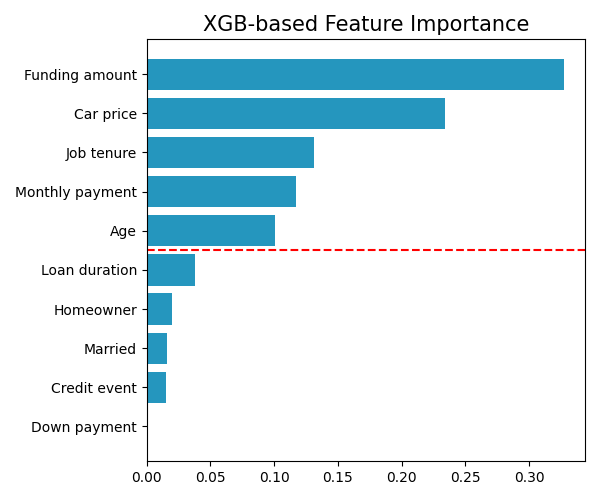

In [71]:
exp.feature_select(method="pfi", threshold=0.9, figsize=(6, 5))

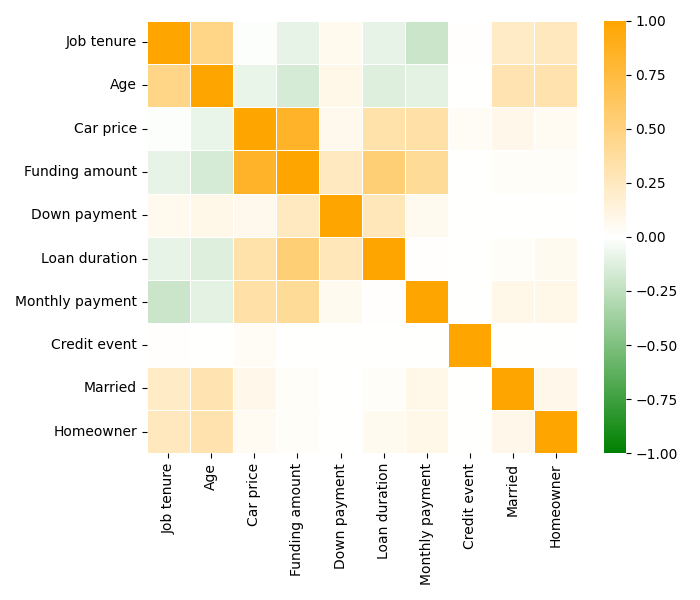

In [72]:
exp.eda(show='multivariate', multi_type='correlation_heatmap', figsize=(7, 6))

---

---

---

In [ ]:
import scipy

# **DEEP WHITE BOXES**

In [62]:
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline
from imblearn.pipeline import make_pipeline as make_imb_pipeline
from piml.models import ReluDNNClassifier
from sklearn.metrics import roc_auc_score


relu = make_imb_pipeline(ReluDNNClassifier(hidden_layer_sizes=(40, 40), l1_reg=0.0008,
                        batch_size=500, learning_rate=0.001))
relu.name = "ReluDNN"
evaluate_classifier(relu)

In [63]:
from piml.models import XGB2Classifier


xgb =XGB2Classifier()

evaluate_classifier(xgb)

In [66]:
from piml.models import GAMINetClassifier

gam = make_imb_pipeline(SMOTE(),GAMINetClassifier())

gam.name = "GAMINet + SMOTE"

evaluate_classifier(gam)

In [21]:
## ReLU-DNN: ReLU Deep Neural Networks with L1-Regularization, e.g. L1_reg = 0.0008
from piml.models import ReluDNNClassifier

clf1 = ReluDNNClassifier(hidden_layer_sizes=(40, 40), l1_reg=0.0008,
                        batch_size=500, learning_rate=0.001)
exp.model_train(model=clf1, name='ReLU-DNN')

'Run data_prepare first.'

In [ ]:
## ReLU-DNN: ReLU Deep Neural Networks with L1-Regularization, e.g. L1_reg = 0.0008
from piml.models import ReluDNNClassifier

parameters = {
    "hidden_layer_sizes": [(40, 40), (50, 50), (60, 60)],
    "l1_reg": [0.0008, 0.001, 0.0012],
    "batch_size": [500, 1000, 2000],
    "learning_rate": [0.001, 0.01, 0.1]
}

result = exp.model_tune("ReLU-DNN", method="randomized", parameters=parameters, n_runs=100, metric="AUC", test_ratio=0.2)
params = result.get_params_ranks(rank=1)
exp.model_train(ReluDNNClassifier(**params), name="ReLU-DNN-FT")

exp.model_diagnose(model="ReLU-DNN-FT", show='accuracy_table')

,ACC,AUC,F1,LogLoss,Brier
,,,,,
Train,0.8090,0.7558,0.1634,0.4346,0.1388
Test,0.8065,0.7720,0.1111,0.4199,0.1340
Gap,-0.0025,0.0162,-0.0522,-0.0148,-0.0047


In [ ]:
from piml.models import GAMINetClassifier

gam = GAMINetClassifier()
exp.model_train(model=gam, name="GAMI-Net")

parameters = {
    "interact_num": [10, 20, 30],
    "loss_threshold": [0.01, 0.1, 0.2]
}

result = exp.model_tune("GAMI-Net", method="randomized", parameters=parameters, n_runs=100,
                        metric="AUC", test_ratio=0.2)
params = result.get_params_ranks(rank=1)
exp.model_train(GAMINetClassifier(**params), name="GAMI-Net")

exp.model_diagnose(model="GAMI-Net", show='accuracy_table')

'The model is already registered.'

'The model is already registered.'

,ACC,AUC,F1,LogLoss,Brier
,,,,,
Train,0.8071,0.7576,0.1823,0.4334,0.1379
Test,0.8044,0.7632,0.1466,0.4242,0.1362
Gap,-0.0027,0.0056,-0.0357,-0.0092,-0.0017


In [76]:
from piml.models import XGB2Classifier
exp.model_train(model=XGB2Classifier(), name="XGB2")
exp.model_diagnose(model="XGB2", show='accuracy_table')

,ACC,AUC,F1,LogLoss,Brier
,,,,,
Train,0.8281,0.8127,0.3513,0.3944,0.1243
Test,0.8071,0.7723,0.2622,0.4208,0.1352
Gap,-0.0210,-0.0404,-0.0891,0.0264,0.0109


# **BLACK BOXES**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()
exp.model_train(model=clf, name='RandomForestClassifier')

parameters = {
    "n_estimators": [100, 300, 500],
    "max_depth": [10, 20, 50],
    "min_samples_split": [2, 6,10],
    "min_samples_leaf": [1, 5]
}

result = exp.model_tune("RandomForestClassifier", method="randomized", parameters=parameters, n_runs=100,
                        metric="AUC", test_ratio=0.2)
params = result.get_params_ranks(rank=1)
exp.model_train(RandomForestClassifier(**params), name="RandomForestClassifier-FT")

exp.model_diagnose(model="RandomForestClassifier", show='accuracy_table')

'The model is already registered.'

,ACC,AUC,F1,LogLoss,Brier
,,,,,
Train,1.0000,1.0000,1.0000,0.1136,0.0203
Test,0.8065,0.7280,0.2976,0.5356,0.1418
Gap,-0.1935,-0.2720,-0.7024,0.4219,0.1214


In [82]:
from xgboost import XGBClassifier

xgb = XGBClassifier()
exp.model_train(model=xgb, name='XGBClassifier')
exp.model_diagnose(model="XGBClassifier", show='accuracy_table')

,ACC,AUC,F1,LogLoss,Brier
,,,,,
Train,0.9336,0.9846,0.8083,0.2043,0.0556
Test,0.7950,0.7347,0.3021,0.4709,0.1495
Gap,-0.1386,-0.2498,-0.5063,0.2666,0.0939


In [ ]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier()
exp.model_train(model=mlp, name='MLPClassifier')
exp.model_diagnose(model="MLPClassifier", show='accuracy_table')

,ACC,AUC,F1,LogLoss,Brier
,,,,,
Train,0.8098,0.7701,0.2236,0.4246,0.1352
Test,0.8091,0.7751,0.1932,0.4169,0.1329
Gap,-0.0007,0.0049,-0.0304,-0.0077,-0.0022


# **WHITE BOXES**

In [73]:
from sklearn.linear_model import LogisticRegression

lreg = LogisticRegression(C=100, max_iter=1000, penalty='l2', solver='liblinear')
exp.model_train(model=lreg, name='LogisticRegression')
exp.model_diagnose(model="LogisticRegression", show='accuracy_table')

,ACC,AUC,F1,LogLoss,Brier
,,,,,
Train,0.8043,0.7413,0.1364,0.4451,0.1409
Test,0.8044,0.7569,0.1155,0.4290,0.1382
Gap,0.0002,0.0156,-0.0209,-0.0161,-0.0027


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
exp.model_train(model=knn, name='KNeighborsClassifier')
exp.model_diagnose(model="KNeighborsClassifier", show='accuracy_table')

,ACC,AUC,F1,LogLoss,Brier
,,,,,
Train,0.8390,0.8728,0.4915,0.3174,0.1072
Test,0.7856,0.6783,0.3050,1.9827,0.1606
Gap,-0.0534,-0.1945,-0.1865,1.6653,0.0534


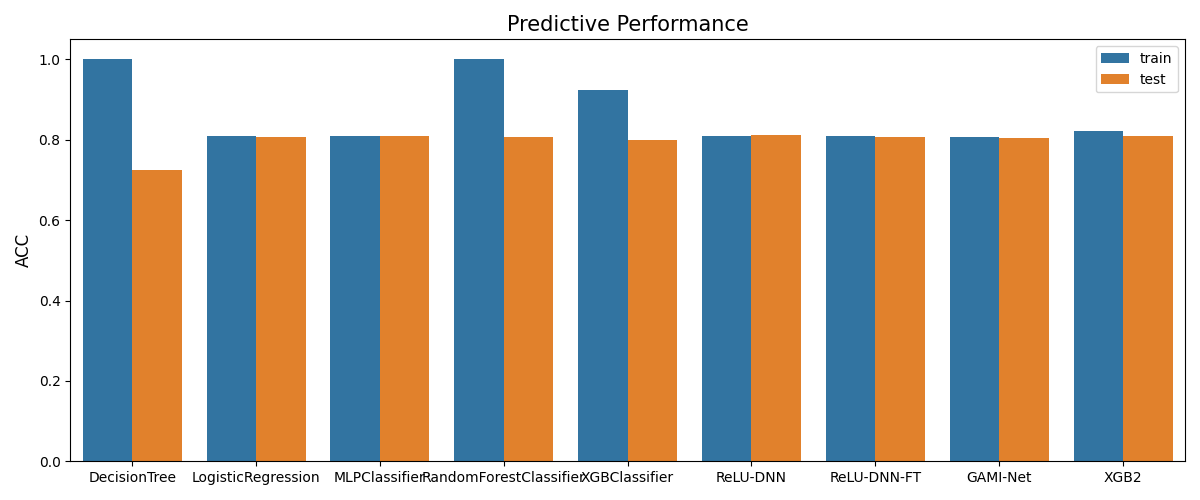

In [ ]:
exp.model_compare(models=["DecisionTree", "LogisticRegression","MLPClassifier", "RandomForestClassifier", "XGBClassifier", "ReLU-DNN", "ReLU-DNN-FT", "GAMI-Net", "XGB2"], show="accuracy_plot", metric="ACC", figsize=(12, 5))

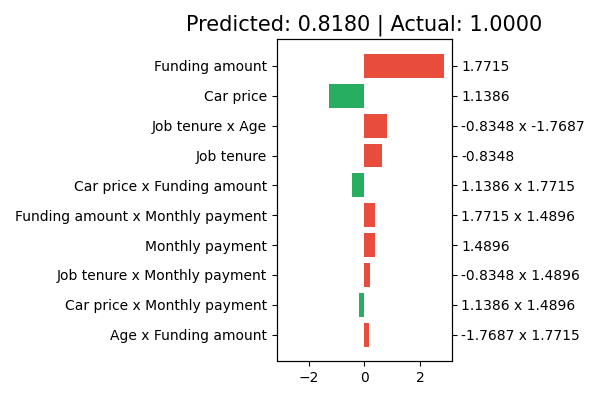

In [95]:
exp.model_interpret(model="XGB2", show="local_ei", sample_id=35, centered=False, original_scale=True, figsize=(6, 4))

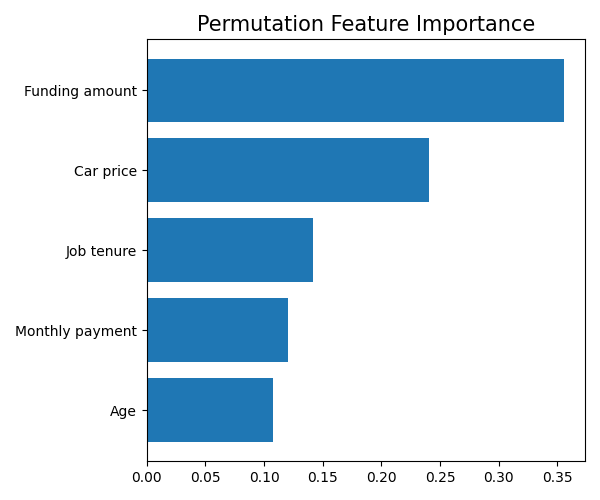

In [83]:
exp.model_explain(model='XGBClassifier', show='pfi', sample_size=20, figsize=(6, 5))

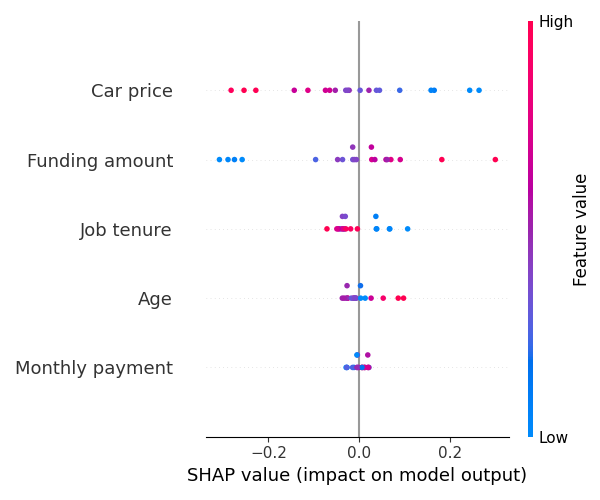

In [103]:
exp.model_explain(model='XGB2', show='shap_summary', sample_size=20, figsize=(6, 5))